# Task 2: Credit Risk Prediction

***Objective:***

 *Predict whether a loan applicant is likely to default on a loan.*


In [42]:
# Libriries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



---



*●	Handle missing data appropriately.*

In [43]:
df = pd.read_csv('/content/Loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [45]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [46]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [48]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [49]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y




---



*●	Visualize key features such as loan amount, education, and income.*

In [51]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

Text(0, 0.5, 'Frequency')

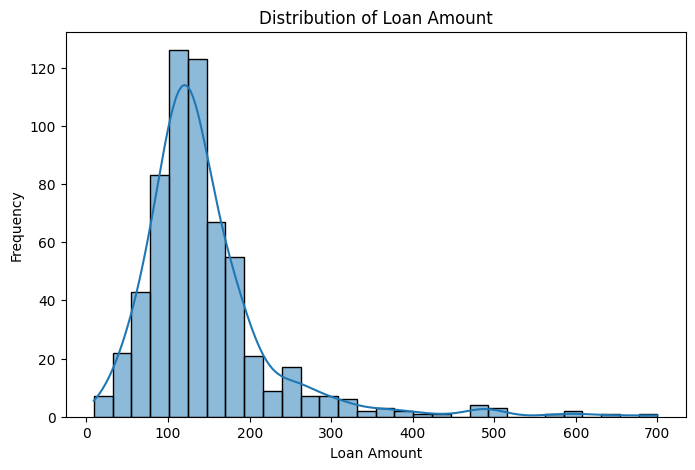

In [52]:
# For Loan amount
plt.figure(figsize=(8, 5))
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Loan Amount')

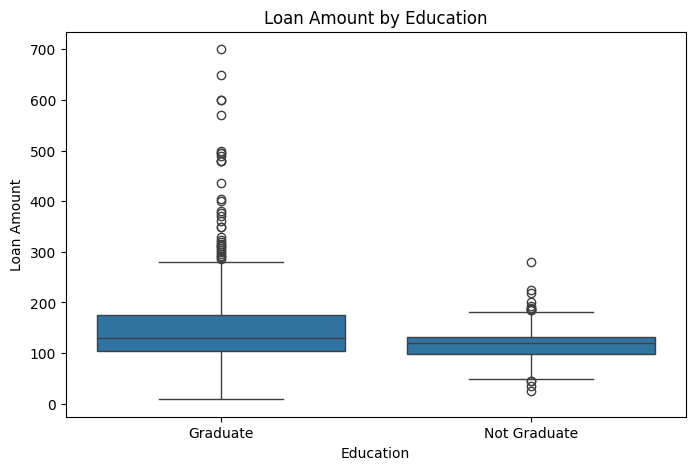

In [53]:
# Loan Amount by Education
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')

Text(0, 0.5, 'Count')

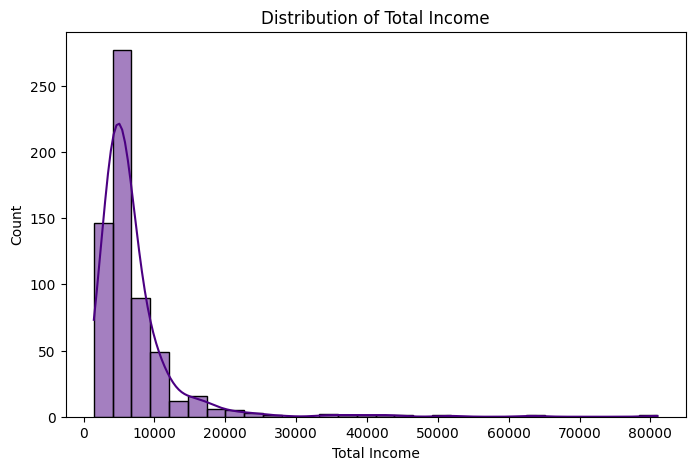

In [54]:
# Distribution of Total Income
plt.figure(figsize=(8, 5))
sns.histplot(df['Total_Income'], bins=30, kde=True, color = 'indigo')
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Count')

Text(0, 0.5, 'Loan Amount')

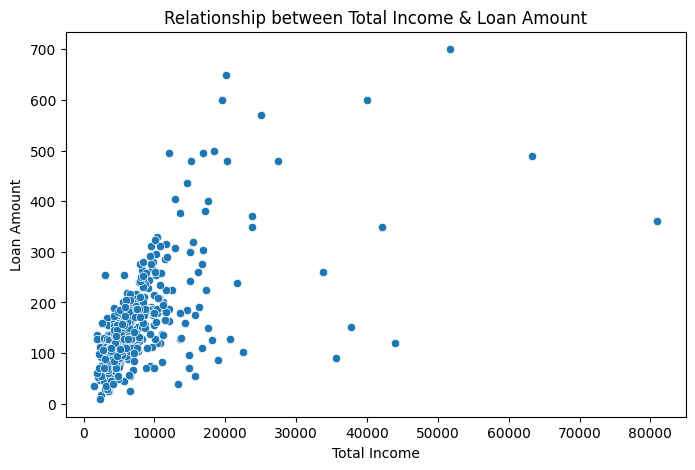

In [55]:
# Relationship between Total Income & Loan Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Total_Income', y='LoanAmount', data=df)
plt.title('Relationship between Total Income & Loan Amount')
plt.xlabel('Total Income')
plt.ylabel('Loan Amount')

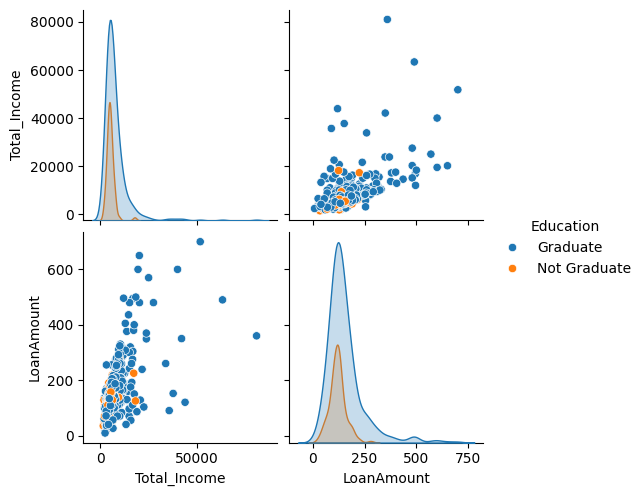

In [56]:
# Overall
sns.pairplot(df[['Total_Income', 'LoanAmount', 'Education']], hue= 'Education')



---



*●	Train a classification model like Logistic Regression.*

In [57]:
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


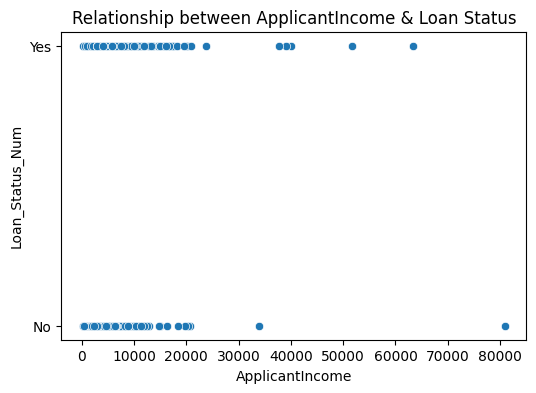

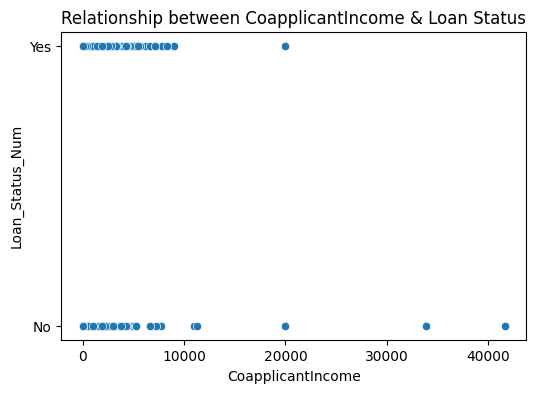

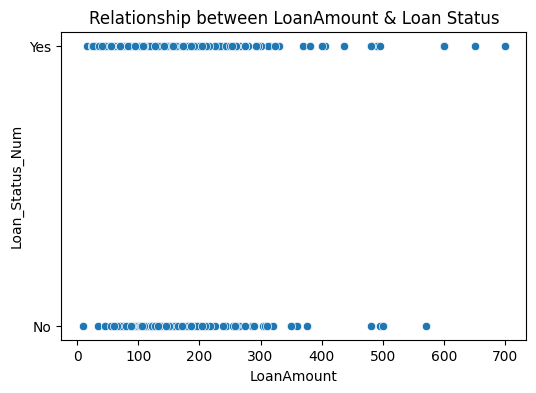

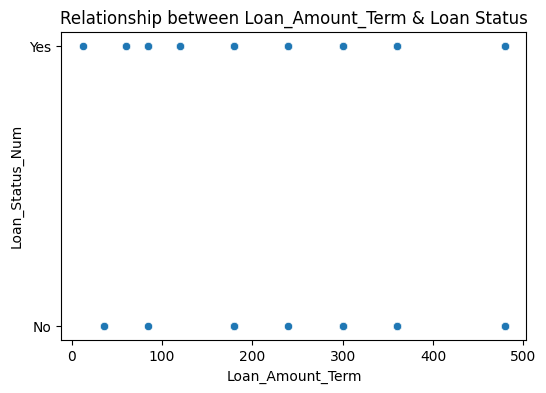

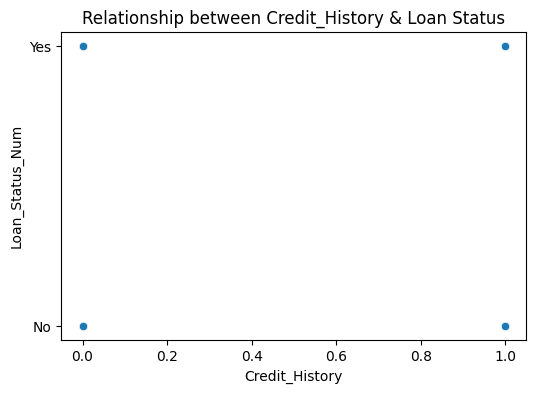

In [58]:
for col in num_cols:
  plt.figure(figsize=(6, 4))
  sns.scatterplot(x=col, y='Loan_Status_Num', data=df)
  plt.title(f'Relationship between {col} & Loan Status')
  plt.yticks([0,1], ['No', 'Yes'])

In [59]:
df.drop(columns='Loan_Status_Num', inplace=True)


In [60]:
df = pd.get_dummies(df, drop_first=True)

In [63]:
X = df.drop("Loan_Status_Y", axis=1)
y = df["Loan_Status_Y"]

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_test, y_train, y_test

(     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 83              6000             2250.0       265.0             360.0   
 90              2958             2900.0       131.0             360.0   
 227             6250             1695.0       210.0             360.0   
 482             2083             3150.0       128.0             360.0   
 464             4166                0.0        98.0             360.0   
 ..               ...                ...         ...               ...   
 71              1875             1875.0        97.0             360.0   
 106            11417             1126.0       225.0             360.0   
 270             3237                0.0        30.0             360.0   
 435            10047                0.0       128.0             240.0   
 102            13650                0.0       128.0             360.0   
 
      Credit_History  Total_Income  Loan_ID_LP001003  Loan_ID_LP001005  \
 83              1.0        8250.0  

In [66]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [74]:
y_pred = model.predict(X_test)
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])



---



*●	Evaluate the model using accuracy and a confusion matrix.*

In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



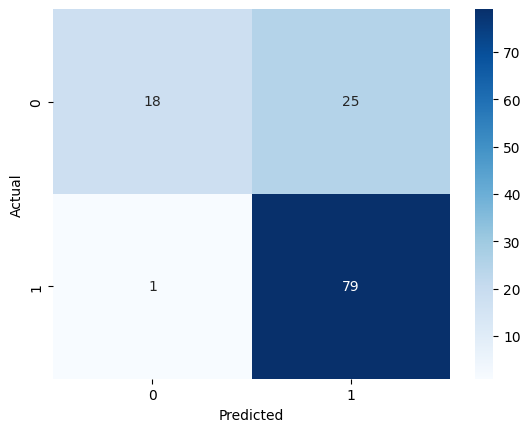

In [72]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()